# Preliminaries

Import Datetime

In [36]:
from datetime import datetime as dt
now = dt.now()
print("Analysis on", now.strftime("%Y-%m-%d"), "at", now.strftime("%H:%M %p"))

Analysis on 2023-08-02 at 09:26 AM


Establish current working directory

In [37]:
import os
os.getcwd()

'/Users/chasecarlson/Documents/GSCM Course Materials/GSCM 575 Machine Learning in Business/Python Pjojects/GSCM-575-ML/code'

Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and structure data

Read in data

In [39]:
df = pd.read_csv('http://web.pdx.edu/~gerbing/data/BodyMeas.csv')
df.shape

(340, 8)

View data frame

In [40]:
df.head()

,Gender,Weight,Height,Waist,Hips,Chest,Hand,Shoe
0,F,200,71,43,46,45,8.5,7.5
1,F,155,66,31,43,37,8.0,8.0
2,F,145,64,35,40,40,7.5,7.5
3,F,140,66,31,40,36,8.0,9.0
4,M,230,76,40,43,44,9.0,12.0


Create the features and target data structures. Gender is our target variable, so we need to  replace "F" & "M" with 0 & 1.

In [41]:
classes = ['Female', 'Male'] # for later visualization
features = ['Weight', 'Height', 'Waist', 'Hips', 'Chest', 'Hand', 'Shoe']
X = df[features]
y = df['Gender'].replace({'F':0, 'M':1})

# Evaluate the model with multiple holdout samples

Access the solution algorithm and instantiate with a maximum depth of 5 using DecisionTreeClassifier.

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model

DecisionTreeClassifier(max_depth=5)

Use 5-fold cross-validation to build and estimate the model for this data set five different times, all with max_depth of 5. Instantiate KFold module and set random_state to 1.

In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)

Assess the fit of each resulting decision tree with accuracy, recall, and precision.

In [44]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt_model, X, y, cv=kf,
                        scoring=('accuracy', 'recall', 'precision'),
                        return_train_score=True)

View the fit scores as a data frame

In [45]:
ds = pd.DataFrame(scores).round(3)
ds

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,0.002,0.002,0.868,0.974,0.917,0.978,0.846,0.970
1,0.001,0.001,0.926,0.971,0.921,0.985,0.946,0.956
2,0.001,0.001,0.897,0.971,0.933,0.964,0.848,0.978
3,0.001,0.001,0.882,0.978,0.861,0.985,0.912,0.971
4,0.001,0.001,0.868,0.971,0.867,0.993,0.839,0.952


In [46]:
print('Mean of test accuracy: %.3f' % ds['test_accuracy'].mean())
print('Mean of test recall: %.3f' % ds['test_recall'].mean())
print('Mean of test precision: %.3f' % ds['test_precision'].mean())

Mean of test accuracy: 0.888
Mean of test recall: 0.900
Mean of test precision: 0.878


# Grid Search: Hyperparameter tuning with Cross-Validation

Run 4 different levels of depth and 4 different numbers of features for a total of 16 different models (4x4=16). This provides 48 different analyses in all (16x3).

Utilize GridSearchCV from sklearn.model_selection to run the analysis:

In [47]:
from sklearn.model_selection import GridSearchCV
kf3 = KFold(n_splits=3, shuffle=True, random_state=1)

params = {'max_depth': [2, 3, 4, 5],
          'max_features': [1, 2, 3, 4]}
grid_search = GridSearchCV(dt_model, param_grid=params, cv=kf3,
                           scoring=('accuracy', 'recall', 'precision'),
                           refit=False, return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4]},
             refit=False, return_train_score=True,
             scoring=('accuracy', 'recall', 'precision'))

Display results for each fold:

In [48]:
df_results = pd.DataFrame(grid_search.cv_results_).round(3)
df_results = df_results.drop(['params'], axis='columns')
df_results.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_max_depth,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5
param_max_features,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4
split0_test_accuracy,0.842,0.851,0.842,0.868,0.719,0.877,0.842,0.904,0.772,0.886,0.868,0.851,0.825,0.86,0.921,0.868
split1_test_accuracy,0.743,0.814,0.912,0.92,0.867,0.876,0.912,0.903,0.929,0.858,0.92,0.876,0.947,0.92,0.894,0.894
split2_test_accuracy,0.805,0.92,0.805,0.894,0.832,0.841,0.85,0.885,0.761,0.867,0.858,0.876,0.823,0.858,0.912,0.903
mean_test_accuracy,0.797,0.862,0.853,0.894,0.806,0.865,0.868,0.897,0.821,0.871,0.882,0.868,0.865,0.879,0.909,0.888


Calculate the mean fit scores over the 5 folds:

In [49]:
df_summary = df_results[['param_max_depth', 'param_max_features', 'mean_test_accuracy',
                         'mean_test_recall', 'mean_test_precision', 'mean_train_accuracy',
                         'mean_train_recall', 'mean_train_precision']]
df_summary = df_summary.rename(columns={
    'param_max_depth': 'depth',
    'param_max_features': 'features',
    'mean_test_accuracy': 'test_accuracy',
    'mean_test_recall': 'test_recall',
    'mean_test_precision': 'test_precision',
    'mean_train_accuracy': 'train_accuracy',
    'mean_train_recall': 'train_recall',
    'mean_train_precision': 'train_precision'})
df_summary

,depth,features,test_accuracy,test_recall,test_precision,train_accuracy,train_recall,train_precision
0,2,1,0.797,0.829,0.803,0.856,0.885,0.840
1,2,2,0.862,0.906,0.838,0.904,0.912,0.900
2,2,3,0.853,0.822,0.880,0.900,0.885,0.915
3,2,4,0.894,0.876,0.914,0.916,0.895,0.936
4,3,1,0.806,0.805,0.815,0.863,0.839,0.876
5,3,2,0.865,0.876,0.855,0.918,0.924,0.917
6,3,3,0.868,0.836,0.898,0.919,0.918,0.926
7,3,4,0.897,0.898,0.896,0.932,0.945,0.923
8,4,1,0.821,0.813,0.834,0.885,0.886,0.885
9,4,2,0.871,0.821,0.907,0.940,0.929,0.949


# Choose Model and Estimate on All Data

Create the decision tree with the chosen parameters on all of the data with the fit() function

In [50]:
mf = dt_model.fit(X,y)

Retrieve the importance of each feature and output to a data frame:

In [51]:
dImp = pd.DataFrame(dt_model.feature_importances_)
dImp = dImp.set_index(X.columns, drop=False)
dImp.columns = ['Importance']
dImp.round(3)

,Importance
Weight,0.000
Height,0.128
Waist,0.046
Hips,0.023
Chest,0.036
Hand,0.700
Shoe,0.067


According to the model, Hand size is the most useful variable in differentiating male and female body types, with 70% importance. Height contributes 12.8%, and the rest of the variables contribute very little.

View the predicted (fitted) values of $\hat{y}$'s with predict():

In [52]:
y_fit = dt_model.predict(X)
y_fit

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Now compare the actual Female/Male value with the corresponding predicted value:

In [53]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y, y_fit))

,0,1
0,163,7
1,2,168


Calculate the basic test scores for accuracy, recal, and precision:

In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print ('Accuracy: %.3f' % accuracy_score(y, y_fit))
print ('Recall: %.3f' % recall_score(y, y_fit))
print ('Precision: %.3f' % precision_score(y, y_fit))
print ('F1: %.3f' % f1_score(y, y_fit))

Accuracy: 0.974
Recall: 0.988
Precision: 0.960
F1: 0.974


Create a decision tree to illustrate the results:

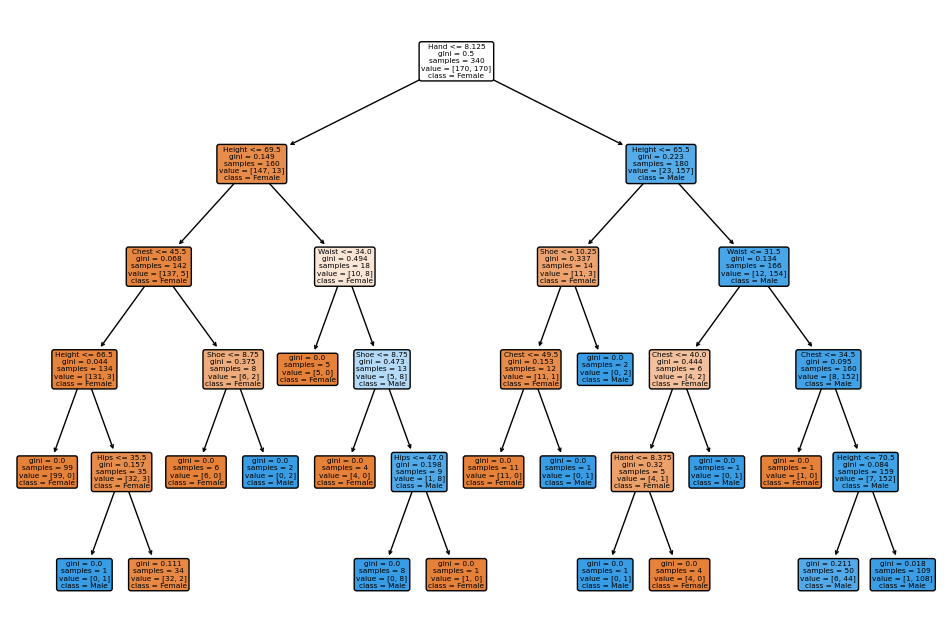

In [55]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(mf, feature_names=features, class_names=classes,
               rounded=True, filled=True)
plt.savefig('dt.Gender.png')

# Apply the model to new data

Create new values for a new customer on which to predict

In [56]:
X.columns

Index(['Weight', 'Height', 'Waist', 'Hips', 'Chest', 'Hand', 'Shoe'], dtype='object')

In [58]:
X_new = [[175, 69, 35, 40, 40, 8, 9]]
X_new = pd.DataFrame(X_new)
X_new.columns = X.columns
X_new

,Weight,Height,Waist,Hips,Chest,Hand,Shoe
0,175,69,35,40,40,8,9


In [59]:
y_prob = dt_model.predict_proba(X_new)
print('Probability of a Female:', round(y_prob[0,0], 3))
print('Probability of a Male:', round(y_prob[0,1], 3))
y_new = dt_model.predict(X_new)
print('Predicted group membership:', y_new)

Probability of a Female: 0.941
Probability of a Male: 0.059
Predicted group membership: [0]
